In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import ast
from collections import Counter
from datetime import date

## 1. Import the dataset

In [2]:
tr = pd.read_csv('data/train.csv')
te = pd.read_csv('data/test.csv')

In [3]:
tr.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


In [4]:
# Data overview
print("Data types : \n" , tr.info())
print("\nUnique values :  \n", tr.nunique())
print("\nMissing values :  ", tr.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [5]:
# Data overview
print("Data types : \n" , te.info())
print("\nUnique values :  \n", te.nunique())
print("\nMissing values :  ", te.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [6]:
# Separate categorical & numerical features
cat_feats = tr.columns[tr.dtypes == 'object']
num_feats = tr.columns[tr.dtypes != 'object']

In [7]:
print("Numeric variables ", len(num_feats))
print(num_feats.get_values())

Numeric variables  5
['id' 'budget' 'popularity' 'runtime' 'revenue']


In [8]:
print("Categorical variables : ", len(cat_feats))
print(cat_feats.get_values())

Categorical variables :  18
['belongs_to_collection' 'genres' 'homepage' 'imdb_id' 'original_language'
 'original_title' 'overview' 'poster_path' 'production_companies'
 'production_countries' 'release_date' 'spoken_languages' 'status'
 'tagline' 'title' 'Keywords' 'cast' 'crew']


In [9]:
# Cleaning- Budget, Revenue 
tr.loc[tr['id'] == 16,'revenue'] = 192864          # Skinning
tr.loc[tr['id'] == 90,'budget'] = 30000000         # Sommersby          
tr.loc[tr['id'] == 118,'budget'] = 60000000        # Wild Hogs
tr.loc[tr['id'] == 149,'budget'] = 18000000        # Beethoven
tr.loc[tr['id'] == 313,'revenue'] = 12000000       # The Cookout 
tr.loc[tr['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
tr.loc[tr['id'] == 464,'budget'] = 20000000        # Parenthood
tr.loc[tr['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
tr.loc[tr['id'] == 513,'budget'] = 930000          # From Prada to Nada
tr.loc[tr['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
tr.loc[tr['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
tr.loc[tr['id'] == 850,'budget'] = 90000000        # Modern Times
tr.loc[tr['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
tr.loc[tr['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
tr.loc[tr['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
tr.loc[tr['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
tr.loc[tr['id'] == 1542,'budget'] = 1              # All at Once
tr.loc[tr['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
tr.loc[tr['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
tr.loc[tr['id'] == 1714,'budget'] = 46000000       # The Recruit
tr.loc[tr['id'] == 1721,'budget'] = 17500000       # Cocoon
tr.loc[tr['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
tr.loc[tr['id'] == 1885,'budget'] = 12             # In the Cut
tr.loc[tr['id'] == 2091,'budget'] = 10             # Deadfall
tr.loc[tr['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
tr.loc[tr['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
tr.loc[tr['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
tr.loc[tr['id'] == 2612,'budget'] = 15000000       # Field of Dreams
tr.loc[tr['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
tr.loc[tr['id'] == 2801,'budget'] = 10000000       # Fracture
tr.loc[tr['id'] == 335,'budget'] = 2 
tr.loc[tr['id'] == 348,'budget'] = 12
tr.loc[tr['id'] == 470,'budget'] = 13000000 
tr.loc[tr['id'] == 513,'budget'] = 1100000
tr.loc[tr['id'] == 640,'budget'] = 6 
tr.loc[tr['id'] == 696,'budget'] = 1
tr.loc[tr['id'] == 797,'budget'] = 8000000 
tr.loc[tr['id'] == 850,'budget'] = 1500000
tr.loc[tr['id'] == 1199,'budget'] = 5 
tr.loc[tr['id'] == 1282,'budget'] = 9               # Death at a Funeral
tr.loc[tr['id'] == 1347,'budget'] = 1
tr.loc[tr['id'] == 1755,'budget'] = 2
tr.loc[tr['id'] == 1801,'budget'] = 5
tr.loc[tr['id'] == 1918,'budget'] = 592 
tr.loc[tr['id'] == 2033,'budget'] = 4
tr.loc[tr['id'] == 2118,'budget'] = 344 
tr.loc[tr['id'] == 2252,'budget'] = 130
tr.loc[tr['id'] == 2256,'budget'] = 1 
tr.loc[tr['id'] == 2696,'budget'] = 10000000

In [10]:
te.loc[te['id'] == 6733,'budget'] = 5000000
te.loc[te['id'] == 3889,'budget'] = 15000000
te.loc[te['id'] == 6683,'budget'] = 50000000
te.loc[te['id'] == 5704,'budget'] = 4300000
te.loc[te['id'] == 6109,'budget'] = 281756
te.loc[te['id'] == 7242,'budget'] = 10000000
te.loc[te['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
te.loc[te['id'] == 5591,'budget'] = 4000000        # The Orphanage
te.loc[te['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
te.loc[te['id'] == 3033,'budget'] = 250 
te.loc[te['id'] == 3051,'budget'] = 50
te.loc[te['id'] == 3084,'budget'] = 337
te.loc[te['id'] == 3224,'budget'] = 4  
te.loc[te['id'] == 3594,'budget'] = 25  
te.loc[te['id'] == 3619,'budget'] = 500  
te.loc[te['id'] == 3831,'budget'] = 3  
te.loc[te['id'] == 3935,'budget'] = 500  
te.loc[te['id'] == 4049,'budget'] = 995946 
te.loc[te['id'] == 4424,'budget'] = 3  
te.loc[te['id'] == 4460,'budget'] = 8  
te.loc[te['id'] == 4555,'budget'] = 1200000 
te.loc[te['id'] == 4624,'budget'] = 30 
te.loc[te['id'] == 4645,'budget'] = 500 
te.loc[te['id'] == 4709,'budget'] = 450 
te.loc[te['id'] == 4839,'budget'] = 7
te.loc[te['id'] == 3125,'budget'] = 25 
te.loc[te['id'] == 3142,'budget'] = 1
te.loc[te['id'] == 3201,'budget'] = 450
te.loc[te['id'] == 3222,'budget'] = 6
te.loc[te['id'] == 3545,'budget'] = 38
te.loc[te['id'] == 3670,'budget'] = 18
te.loc[te['id'] == 3792,'budget'] = 19
te.loc[te['id'] == 3881,'budget'] = 7
te.loc[te['id'] == 3969,'budget'] = 400
te.loc[te['id'] == 4196,'budget'] = 6
te.loc[te['id'] == 4221,'budget'] = 11
te.loc[te['id'] == 4222,'budget'] = 500
te.loc[te['id'] == 4285,'budget'] = 11
te.loc[te['id'] == 4319,'budget'] = 1
te.loc[te['id'] == 4639,'budget'] = 10
te.loc[te['id'] == 4719,'budget'] = 45
te.loc[te['id'] == 4822,'budget'] = 22
te.loc[te['id'] == 4829,'budget'] = 20
te.loc[te['id'] == 4969,'budget'] = 20
te.loc[te['id'] == 5021,'budget'] = 40 
te.loc[te['id'] == 5035,'budget'] = 1 
te.loc[te['id'] == 5063,'budget'] = 14 
te.loc[te['id'] == 5119,'budget'] = 2 
te.loc[te['id'] == 5214,'budget'] = 30 
te.loc[te['id'] == 5221,'budget'] = 50 
te.loc[te['id'] == 4903,'budget'] = 15
te.loc[te['id'] == 4983,'budget'] = 3
te.loc[te['id'] == 5102,'budget'] = 28
te.loc[te['id'] == 5217,'budget'] = 75
te.loc[te['id'] == 5224,'budget'] = 3 
te.loc[te['id'] == 5469,'budget'] = 20 
te.loc[te['id'] == 5840,'budget'] = 1 
te.loc[te['id'] == 5960,'budget'] = 30
te.loc[te['id'] == 6506,'budget'] = 11 
te.loc[te['id'] == 6553,'budget'] = 280
te.loc[te['id'] == 6561,'budget'] = 7
te.loc[te['id'] == 6582,'budget'] = 218
te.loc[te['id'] == 6638,'budget'] = 5
te.loc[te['id'] == 6749,'budget'] = 8 
te.loc[te['id'] == 6759,'budget'] = 50 
te.loc[te['id'] == 6856,'budget'] = 10
te.loc[te['id'] == 6858,'budget'] =  100
te.loc[te['id'] == 6876,'budget'] =  250
te.loc[te['id'] == 6972,'budget'] = 1
te.loc[te['id'] == 7079,'budget'] = 8000000
te.loc[te['id'] == 7150,'budget'] = 118
te.loc[te['id'] == 6506,'budget'] = 118
te.loc[te['id'] == 7225,'budget'] = 6
te.loc[te['id'] == 7231,'budget'] = 85
te.loc[te['id'] == 5222,'budget'] = 5
te.loc[te['id'] == 5322,'budget'] = 90
te.loc[te['id'] == 5350,'budget'] = 70
te.loc[te['id'] == 5378,'budget'] = 10
te.loc[te['id'] == 5545,'budget'] = 80
te.loc[te['id'] == 5810,'budget'] = 8
te.loc[te['id'] == 5926,'budget'] = 300
te.loc[te['id'] == 5927,'budget'] = 4
te.loc[te['id'] == 5986,'budget'] = 1
te.loc[te['id'] == 6053,'budget'] = 20
te.loc[te['id'] == 6104,'budget'] = 1
te.loc[te['id'] == 6130,'budget'] = 30
te.loc[te['id'] == 6301,'budget'] = 150
te.loc[te['id'] == 6276,'budget'] = 100
te.loc[te['id'] == 6473,'budget'] = 100
te.loc[te['id'] == 6842,'budget'] = 30

## 2. Preprocessing

In [11]:
# Separate categorical & numerical features
tr_cat = tr[cat_feats]
tr_num = tr[num_feats]

In [12]:
te_cat = te[cat_feats]
te_num = te[num_feats[:-1]]

### 2-1. Numeric Features

In [13]:
tr_num.head(10)

,id,budget,popularity,runtime,revenue
0,1,14000000,6.575393,93.0,12314651
1,2,40000000,8.248895,113.0,95149435
2,3,3300000,64.299990,105.0,13092000
3,4,1200000,3.174936,122.0,16000000
4,5,0,1.148070,118.0,3923970
5,6,8000000,0.743274,83.0,3261638
6,7,14000000,7.286477,92.0,85446075
7,8,0,1.949044,84.0,2586511
8,9,0,6.902423,100.0,34327391
9,10,6000000,4.672036,91.0,18750246


In [14]:
tr_num.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.266135e+07,8.463274,107.856571,6.668176e+07
std,866.169729,3.702662e+07,12.104000,22.086434,1.375149e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.401550e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,3.000000e+07,10.890983,118.000000,6.877599e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\jjone\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\jjone\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


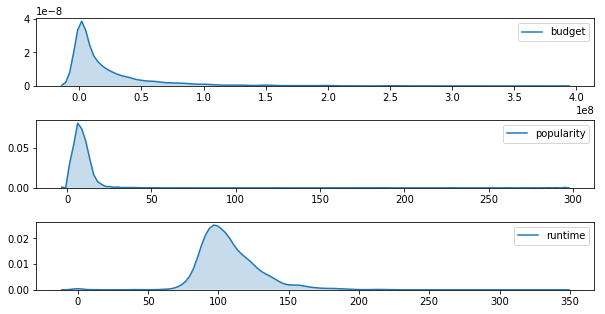

In [15]:
# Distributions of numeric features in train set
plt.figure(figsize = (10, 5))    
for i in range(0, 3):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(tr_num.iloc[:, i+1], shade = 'b')
    plt.subplots_adjust(wspace = .5, hspace = .5)

C:\Users\jjone\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\jjone\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\jjone\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


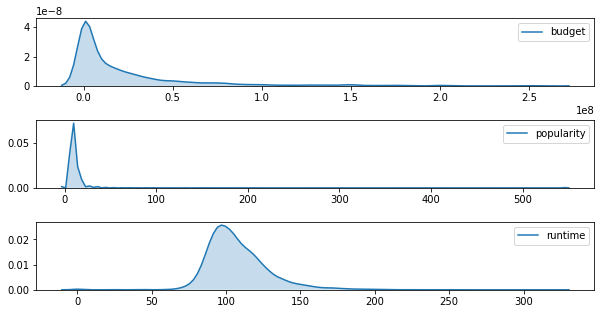

In [16]:
# Distributions of numeric features in test set
plt.figure(figsize = (10, 5))    
for i in range(0, 3):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(te_num.iloc[:, i+1], shade = 'b')
    plt.subplots_adjust(wspace = .5, hspace = .5)

In [17]:
tr_num['runtime_h'], tr_num['runtime_m'] = tr_num.runtime // 60, tr_num.runtime % 60
te_num['runtime_h'], te_num['runtime_m'] = te_num.runtime // 60, te_num.runtime % 60

C:\Users\jjone\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\jjone\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jjone\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


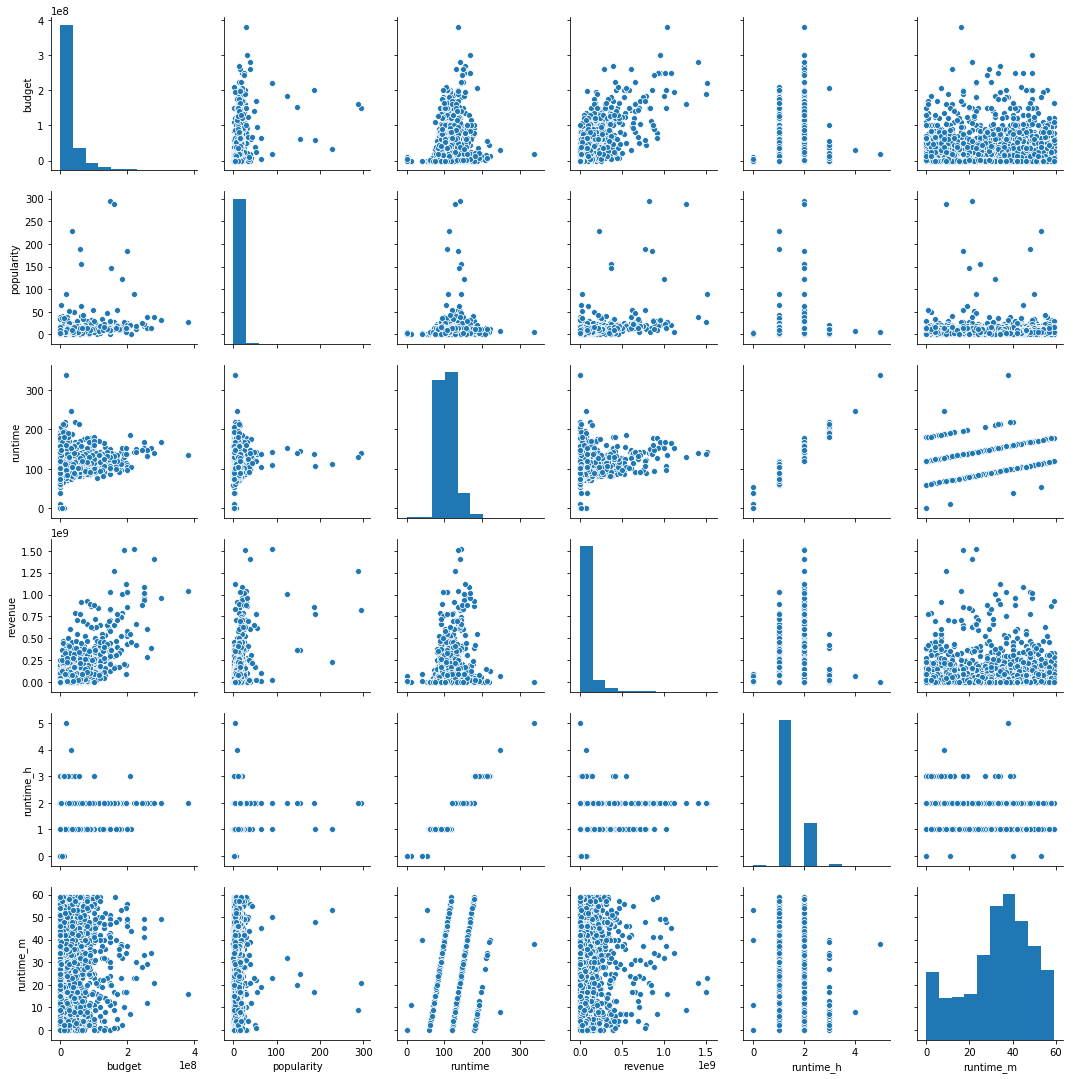

In [19]:
sns.pairplot(tr_num.iloc[:, 1:])

### 2-2. Categorical Features

In [20]:
# Concat train and test set
cut = len(tr)
df_cat = pd.concat([tr_cat, te_cat], axis = 0)
df_cat = df_cat.reset_index(drop = True)

In [34]:
df_cat.head(3)

,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,...,tagline,title,Keywords,cast,crew,n_genres,n_spoken_languages,n_production_companies,n_production_countries,is_collection
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",Comedy;,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,Paramount Pictures;United Artists;Metro-Goldwy...,US;,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",1,1,3,1,True
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",Comedy;Drama;Family;Romance;,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,Walt Disney Pictures;,US;,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",4,1,1,1,True
2,NaN,Drama;,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,Bold Films;Blumhouse Productions;Right of Way ...,US;,...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",1,1,3,1,False


In [22]:
def list_to_dict(row, a):
    # Convert to dict
    dict_list = ast.literal_eval(row)
    temp = ''
    for d in dict_list:
        if(a in d.keys()):
            temp += d[a] + ';'
    return temp

In [23]:
def dict_to_col(col, key_name):
    # Fill NAs
    df_cat[col] = df_cat[col].fillna('[{}]')
    # Get the element list
    df_cat[col] = df_cat[col].apply(lambda row: list_to_dict(row, key_name))
    # The number of elements
    df_cat['n_'+col] = df_cat[col].apply(lambda row: len(row.split(';')) - 1)

### genres

In [24]:
# Processing the genre column
dict_to_col('genres', 'name')

### spoken_language

In [25]:
df_cat.spoken_languages[3]

"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]"

In [26]:
# Processing the spoken language column
dict_to_col('spoken_languages', 'iso_639_1')

### production companies and countries

In [27]:
df_cat.production_companies[100]

"[{'name': 'Epic Productions', 'id': 1988}, {'name': 'Vision International', 'id': 3603}, {'name': 'Vision PDG', 'id': 4109}, {'name': 'Trans World Entertainment (TWE)', 'id': 17915}]"

In [28]:
df_cat.production_countries[100]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [29]:
# Processing the production company & country column
dict_to_col('production_companies', 'name')
dict_to_col('production_countries', 'iso_3166_1')

### belongs to collection

In [30]:
df_cat.belongs_to_collection[1]

"[{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]"

In [31]:
df_cat['is_collection'] = df_cat.belongs_to_collection.notnull()

### release date

In [32]:
df_cat['release_date'] = pd.to_datetime(df_cat.release_date)

In [37]:
df_cat['year'] = df_cat.release_date.dt.year
df_cat['month'] = df_cat.release_date.dt.month 
df_cat['day'] = df_cat.release_date.dt.day
df_cat['weekofday'] = df_cat.release_date.dt.dayofweek
df_cat['quarter'] = df_cat.release_date.dt.quarter

### 2-3. Seperate cast, crew and text description columns

### Keywords

In [38]:
df_cat.Keywords[3]

"[{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'nerve gas'}]"

In [39]:
dict_to_col('Keywords', 'name')

In [40]:
# Seperate text columns 
text_feats = ['Keywords', 'original_title', 'title', 'overview', 'tagline']
df_text = df_cat.loc[:, text_feats]
df_text.head()

,Keywords,original_title,title,overview,tagline
0,time travel;sequel;hot tub;duringcreditsstinger;,Hot Tub Time Machine 2,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",The Laws of Space and Time are About to be Vio...
1,coronation;duty;marriage;falling in love;,The Princess Diaries 2: Royal Engagement,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,It can take a lifetime to find true love; she'...
2,jazz;obsession;conservatory;music teacher;new ...,Whiplash,Whiplash,"Under the direction of a ruthless instructor, ...",The road to greatness can take you to the edge.
3,mystery;bollywood;police corruption;crime;indi...,Kahaani,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,NaN
4,,마린보이,Marine Boy,Marine Boy is the story of a former national s...,NaN


### cast, crew

In [41]:
dict_to_col('cast', 'name')

In [44]:
ast.literal_eval(df_cat.crew[5])

[{'credit_id': '52fe46f49251416c9106558b',
  'department': 'Writing',
  'gender': 2,
  'id': 67372,
  'job': 'Novel',
  'name': 'Collodi',
  'profile_path': '/sMMNkbghC5alRHZEblJA0T4c9uO.jpg'},
 {'credit_id': '52fe46f49251416c91065573',
  'department': 'Directing',
  'gender': 2,
  'id': 176063,
  'job': 'Director',
  'name': 'Hal Sutherland',
  'profile_path': None},
 {'credit_id': '52fe46f49251416c91065585',
  'department': 'Writing',
  'gender': 0,
  'id': 193849,
  'job': 'Screenplay',
  'name': "Dennis O'Flaherty",
  'profile_path': None},
 {'credit_id': '5345adea0e0a265ff8000075',
  'department': 'Writing',
  'gender': 0,
  'id': 1213367,
  'job': 'Teleplay',
  'name': "Barry O'Brien",
  'profile_path': '/7zl5GGMrLpEFLVSOkRvlCBzWpN0.jpg'},
 {'credit_id': '578f9fc192514134b00026e5',
  'department': 'Writing',
  'gender': 2,
  'id': 1235078,
  'job': 'Screenplay',
  'name': 'Robby London',
  'profile_path': None},
 {'credit_id': '578f9fcc9251411cad00031b',
  'department': 'Producti

In [45]:
# Fill NAs
df_cat['crew'] = df_cat['crew'].fillna('[{}]')

# Get the list of crew jobs 
df_cat['crew_job'] = df_cat.crew.apply(lambda row: list_to_dict(row, 'job'))

# Get the number of elements
df_cat['n_crew_job'] = df_cat.crew_job.apply(lambda row: len(row.split(';')) -1)

In [46]:
drop_feats = ['belongs_to_collection', 'homepage', 'imdb_id', 'poster_path', 'cast', 'crew']

In [47]:
df_cat.drop(drop_feats, axis = 1, inplace=True)
df_cat.drop(text_feats, axis = 1, inplace=True)

In [48]:
df_cat.head()

,genres,original_language,production_companies,production_countries,release_date,spoken_languages,status,n_genres,n_spoken_languages,n_production_companies,...,is_collection,year,month,day,weekofday,quarter,n_Keywords,n_cast,crew_job,n_crew_job
0,Comedy;,en,Paramount Pictures;United Artists;Metro-Goldwy...,US;,2015-02-20,en;,Released,1,1,3,...,True,2015.0,2.0,20.0,4.0,1.0,4,24,First Assistant Director;Director;Writer;Chara...,72
1,Comedy;Drama;Family;Romance;,en,Walt Disney Pictures;,US;,2004-08-06,en;,Released,4,1,1,...,True,2004.0,8.0,6.0,4.0,3.0,4,20,Director;Director of Photography;Original Musi...,9
2,Drama;,en,Bold Films;Blumhouse Productions;Right of Way ...,US;,2014-10-10,en;,Released,1,1,3,...,False,2014.0,10.0,10.0,4.0,4.0,12,51,Casting;Music Editor;Executive In Charge Of Pr...,64
3,Thriller;Drama;,hi,,IN;,2012-03-09,en;hi;,Released,2,2,0,...,False,2012.0,3.0,9.0,4.0,1.0,7,7,Director;Producer;Writer;,3
4,Action;Thriller;,ko,,KR;,2009-02-05,ko;,Released,2,1,0,...,False,2009.0,2.0,5.0,3.0,1.0,0,4,Director;Writer;,2


## Save the preprocessed dataframe

In [50]:
tr_cat = df_cat[:cut] 
te_cat = df_cat[cut:]

In [51]:
tr = pd.concat([tr_num, tr_cat], axis = 1)
te = pd.concat([te_num, te_cat], axis = 1)

In [52]:
tr.to_csv('data/tr_processed.csv', encoding = 'utf-8-sig', index = False)
te.to_csv('data/te_processed.csv', encoding = 'utf-8-sig', index = False)